# <b>Capstone Project - EDA<b/>

## <b> Project Name- E-Commerce Data Analysis<b/>

## <b> Project Type: Exploratory Data Analysis<b/>

## Objective
The goal of this project is to perform Data Cleaning and Exploratory Data Analysis (EDA) 
on a real-world E-Commerce dataset to uncover meaningful patterns, customer behaviors, and country-wise trends.

## Importing the necessory Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
df= pd.read_csv('C:\\Users\Admin\\Desktop\\data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## About the Dataset

<p>Company - UK-based and registered non-store online retail. This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
The company mainly sells unique all-occasion gifts.
Many customers of the company are wholesalers.</p>

## Key Variables

<li>Invoice No  : Unique transaction ID</li>
<li>StockCode   : Unique product identifier</li>
<li>Qunatity    : Number of items purchased</li>
<li>InvoiceDate : Timestamp of purchase</li>
<li>CustomerID  : Unique customer identifier</li>
<li>Country     : Location of the customer</li>

## Data Understanding

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.shape

(541909, 8)

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Checking Unique Values

In [13]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [14]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

#### Checking for Negative values

In [3]:
(df['Quantity'].values<0).sum()

10624

#### Checking for Missing values

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Observations from Data Inspection

- CustomerID has missing values → Remove rows without CustomerID.
- Quantity contains negative values (returns/refunds) → Filter out invalid transactions.
- InvoiceDate is stored as text → Convert it to datetime format.
- UnitPrice has extreme outliers (negative prices) → Validate & clean.

## Data Cleaning

In [5]:
df.duplicated().sum()

5268

In [6]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Remove Missing and Negative values

In [7]:
df["Description"].fillna("Unknown", inplace = True)  # In-place, meaning the original DataFrame df is updated directly.

In [8]:
df=df.dropna(subset=["CustomerID"])   

# dropna(), subset is a parameter that specifies which columns to check for NaN (missing) values.
#Rows with missing CustomerID were removed.

In [9]:
(df['Quantity'].values<0).sum()

8905

In [10]:
df = df[df['Quantity']>=0]

In [23]:
(df['Quantity'].values<0).sum()

0

In [11]:
df.count()

InvoiceNo      397924
StockCode      397924
Description    397924
Quantity       397924
InvoiceDate    397924
UnitPrice      397924
CustomerID     397924
Country        397924
dtype: int64

###  Create a new Column

In [12]:
df['Amount Spent'] = df['Quantity']*df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


####  DataType Conversion

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# errors='coerce ' - handles invalid dates

In [15]:
df.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
Amount Spent           float64
dtype: object

### Extract

In [16]:
df['Year'] = df['InvoiceDate'].dt.year         #dt - accessor
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

In [17]:
df['Year_Month'] =df['InvoiceDate'].dt.to_period('M')

# Exploratory Data Analysis (EDA)

## 🎯 Objectives:
•	Discover patterns across time, customers, and countries.

•	Identify peak order times and revenue contributors


### Orders Per Customer

### How many orders did each customer make?

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount Spent,Year,Month,Day,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12


In [19]:
Order_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name = 'Order count').sort_values(by = 'Order count', ascending = False) 
Order_per_customer

,CustomerID,Order count
326,12748.0,210
1880,14911.0,201
4011,17841.0,124
562,13089.0,97
1662,14606.0,93
...,...,...
1476,14355.0,1
793,13403.0,1
2306,15488.0,1
1474,14353.0,1


### Display the TOP 5 customers with the most orders

In [20]:
Order_per_customer.head()

,CustomerID,Order count
326,12748.0,210
1880,14911.0,201
4011,17841.0,124
562,13089.0,97
1662,14606.0,93


## 2.	📅 Monthly Orders

### Count orders per month

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount Spent,Year,Month,Day,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12


In [23]:
Monthly_Orders = (df.groupby('Year_Month')['InvoiceNo'].nunique().reset_index(name = 'Order count')
Monthly_Orders

,Year_Month,Order count
0,2010-12,1400
1,2011-01,987
2,2011-02,998
3,2011-03,1321
4,2011-04,1149
5,2011-05,1555
6,2011-06,1393
7,2011-07,1331
8,2011-08,1281
9,2011-09,1756


### Plot time-series to find sales trends.

In [26]:
Monthly_sales = df.groupby('Year_Month')['Amount Spent'].sum().reset_index()
Monthly_sales.head()

,Year_Month,Amount Spent
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361


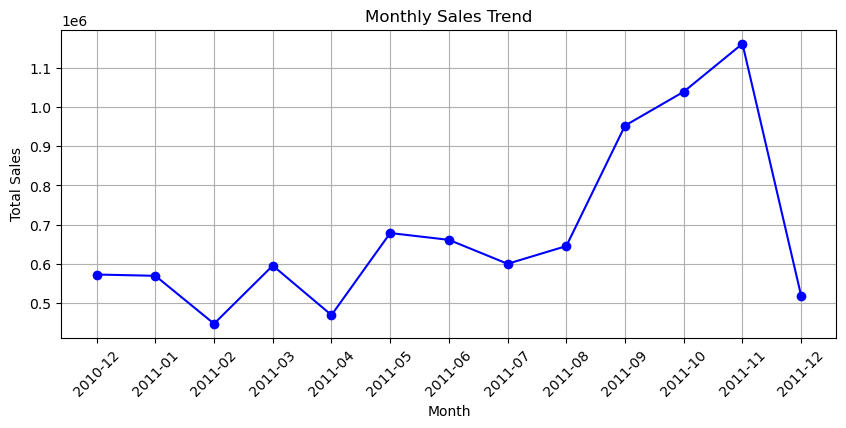

In [37]:
# line plot
plt.figure(figsize=(10,4))

plt.plot(Monthly_sales['Year_Month'].astype(str), Monthly_sales['Amount Spent'], marker='o', color='b')

#astype(str) converts the Year_month column to string format
# marker o is used at each point to emphasize the individual data poits

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Show gridlines for better readability
plt.grid(True)
plt.show()

## 3. Daily Orders

### Extract Day of Week Name

In [41]:
df['Day_of_week'] = df['InvoiceDate'].dt.day_name()

In [46]:
orders_by_day = df.groupby('Day_of_week')['InvoiceNo'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# reindex Reorder rows/columns, align with new index

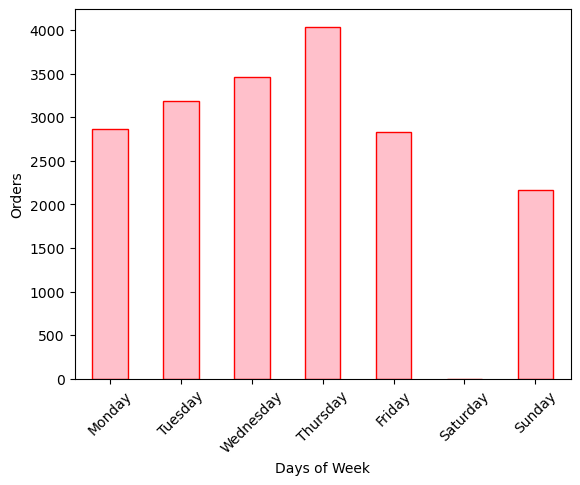

In [54]:
orders_by_day.plot(kind = 'bar', color = 'Pink', edgecolor = 'red')
plt.xlabel("Days of Week")
plt.ylabel("Orders")
plt.xticks(rotation = 45)
plt.show()

### Hourly Orders

In [56]:
df['Hours'] = df['InvoiceDate'].dt.hour

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount Spent,Year,Month,Day,Year_Month,Day_of_week,Hours
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12,Wednesday,8


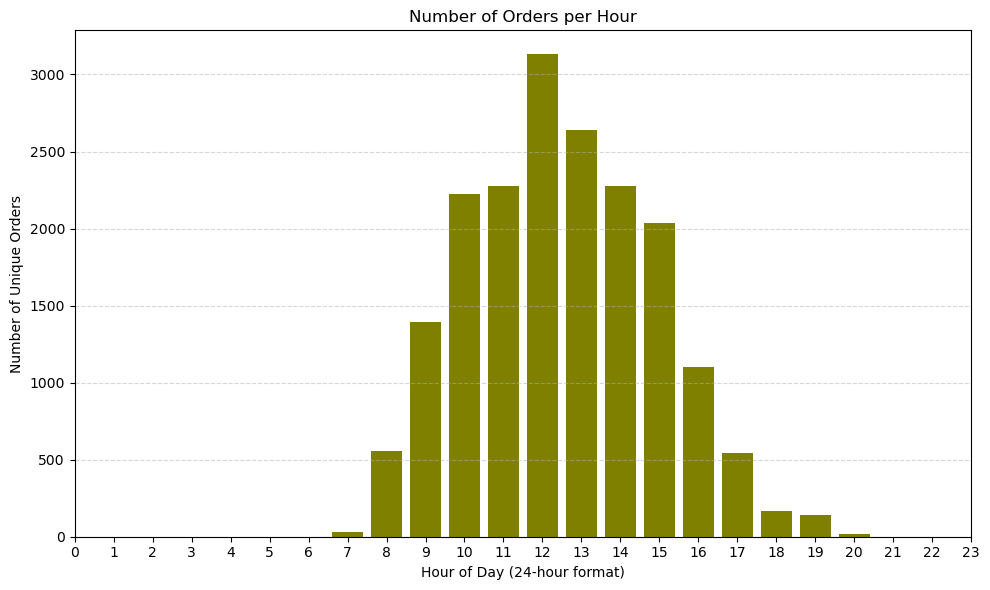

In [65]:
orders_by_hour = df.groupby('Hours')['InvoiceNo'].nunique().reset_index(name='Order_Count')

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(orders_by_hour['Hours'], orders_by_hour['Order_Count'], color='olive')
plt.title('Number of Orders per Hour')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Unique Orders')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

In [66]:
orders_by_hour

,Hours,Order_Count
0,6,1
1,7,29
2,8,555
3,9,1394
4,10,2226
5,11,2277
6,12,3130
7,13,2637
8,14,2275
9,15,2038


## Unit Price Distribution

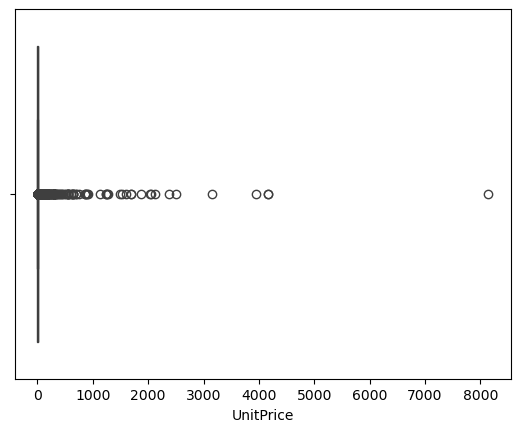

In [69]:
sns.boxplot(x= df['UnitPrice'])
plt.show()

## 6.	🌍 Country-wise Analysis:

### Which countries place the most orders?

In [74]:
orders_by_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False).head()
orders_by_country

Country
United Kingdom    16649
Germany             457
France              389
EIRE                260
Belgium              98
Name: InvoiceNo, dtype: int64

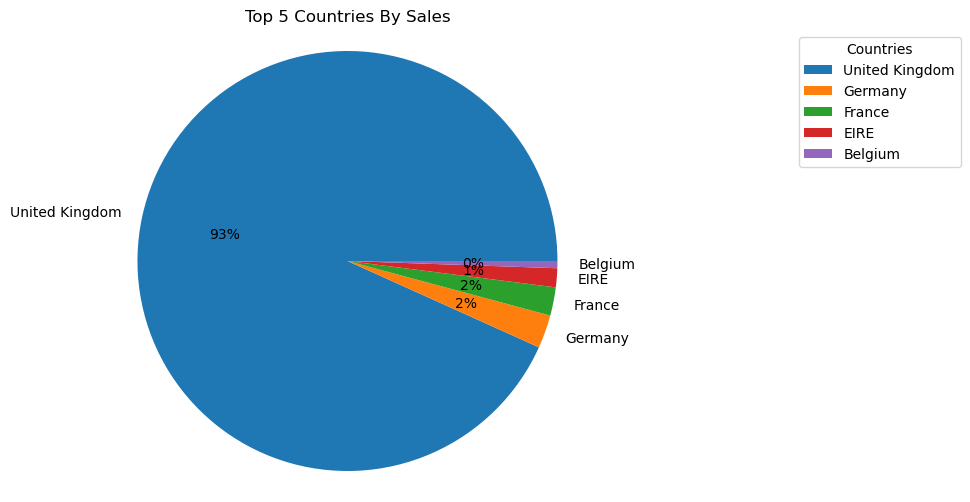

In [84]:
plt.figure(figsize = (8,6))
plt.pie(orders_by_country, labels = orders_by_country.index, autopct='%d%%')
plt.axis('equal')    # Keeps pie chart as a circle
plt.title("Top 5 Countries By Sales")
plt.legend(title = "Countries", bbox_to_anchor = (1,0,0.5,1)) #(x0, y0, width, height)
plt.show()

###  Total Amount Spent By Countries

In [92]:
amount_by_country = df.groupby('Country')['Amount Spent'].nunique().sort_values(ascending = False).head()
amount_by_country

Country
United Kingdom    2793
EIRE               559
Germany            501
France             476
Netherlands        426
Name: Amount Spent, dtype: int64

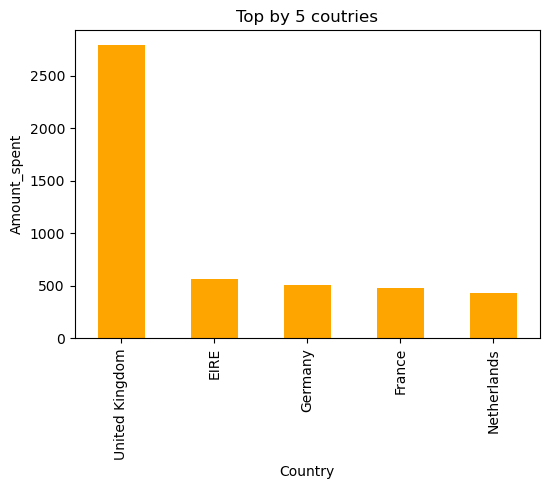

In [95]:
plt.figure(figsize=(6, 4))
amount_by_country.head(5).plot(kind="bar", color= 'orange')
plt.title("Top by 5 coutries")
plt.xlabel("Country")
plt.ylabel("Amount_spent")
plt.show()

## Trend Analysis

### What month had the highest sales?

In [96]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount Spent,Year,Month,Day,Year_Month,Day_of_week,Hours
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12,Wednesday,8


In [114]:
Monthly_sales = df.groupby('Month')['Amount Spent'].sum().sort_values(ascending = False)
Monthly_sales.head(1)

Month
11    1161817.38
Name: Amount Spent, dtype: float64

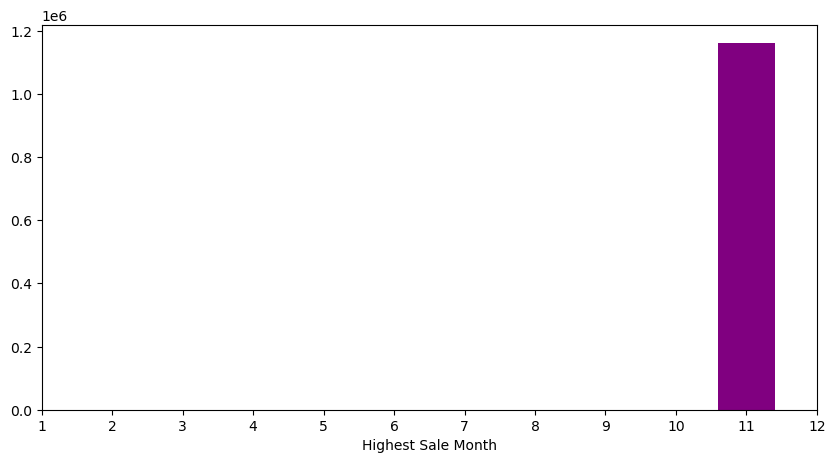

In [117]:
all_months = range(1, 13)
Monthly_sales = Monthly_sales.reindex(all_months, fill_value=0)

max_value = Monthly_sales.max()
max_month = Monthly_sales.idxmax()

plt.figure(figsize= (10,5))
plt.bar(max_month, max_value, color = 'purple')
plt.xlabel("Highest Sale Month")
plt.xticks(Monthly_sales.index)
plt.show()


# Business Conclusion

In [ ]:
The United Kingdom(Uk) generated the highest revenue overall.This is likely because the business is either based in the UK or 
has a stronger market presence and customer base there.

November 2011 has the highest sales.

The company receives the highest number of orders at 12:00pm.

The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward.
 